In [1]:
# xcube_sh imports
from xcube_sh.cube import open_cube
from xcube_sh.config import CubeConfig
from xcube_sh.sentinelhub import SentinelHub

# xcube imports
from xcube.core.geom import mask_dataset_by_geometry

# Various utilities
from datetime import date
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Load the catchment outline

In [2]:
catchment_outline = gpd.read_file('catchment_outline.geojson')

#### List all the available dataset

In [3]:
SH = SentinelHub()
SH.dataset_names

['LETML1',
 'LOTL1',
 'LETML2',
 'CUSTOM',
 'LMSSL1',
 'LTML2',
 'LOTL2',
 'S3OLCI',
 'S3SLSTR',
 'DEM',
 'MODIS',
 'S5PL2',
 'HLS',
 'LTML1',
 'S1GRD',
 'S2L2A',
 'S2L1C']

In [4]:
SH.band_names('S3SLSTR')

['S1',
 'S2',
 'S3',
 'S4',
 'S4_A',
 'S4_B',
 'S5',
 'S5_A',
 'S5_B',
 'S6',
 'S6_A',
 'S6_B',
 'S7',
 'S8',
 'S9',
 'F1',
 'F2',
 'CLOUD_FRACTION',
 'SEA_ICE_FRACTION',
 'SEA_SURFACE_TEMPERATURE',
 'DEW_POINT',
 'SKIN_TEMPERATURE',
 'SNOW_ALBEDO',
 'SNOW_DEPTH',
 'SOIL_WETNESS',
 'TEMPERATURE',
 'TOTAL_COLUMN_OZONE',
 'TOTAL_COLUMN_WATER_VAPOR']

Configuring the data content of the cube

In [5]:
bbox = catchment_outline.bounds.iloc[0]

start_date = date(2021, 2, 1)
end_date = date(2021, 7, 1)

cube_config = CubeConfig(
    dataset_name='S3SLSTR',
    band_names=['S1', 'S2', 'S3', 'S5', 'S6', 'F1', 'SNOW_DEPTH', 'SNOW_ALBEDO'],
    bbox=bbox.tolist(),
    spatial_res=0.009,   # = 500 meters in degree>
    time_range=[start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")]
)

/home/conda/master-asi-conae/315434deb1b1e05eacacc41e1b0529b1837100f46402a32041d77ba54ae6c5f3-20230213-125825-013239-74-edc-2022.10-14/lib/python3.9/site-packages/xcube_sh/config.py:248: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  time_tolerance = pd.to_timedelta(time_tolerance)


In [6]:
cube = open_cube(cube_config, api_url="https://creodias.sentinel-hub.com")
cube

<xarray.Dataset>
Dimensions:      (time: 353, lat: 33, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float64 46.95 46.94 46.93 46.92 ... 46.68 46.67 46.66
  * lon          (lon) float64 11.03 11.03 11.04 11.05 ... 11.34 11.35 11.36
  * time         (time) datetime64[ns] 2021-02-01T09:57:08 ... 2021-06-30T20:...
    time_bnds    (time, bnds) datetime64[ns] dask.array<chunksize=(353, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    F1           (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    S1           (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    S2           (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    S3           (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    S5           (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    S6           (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    SNOW_ALBEDO  (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
    SNOW_DEPTH   (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S3SLSTR Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2023-02-21T09:41:27.870387
    time_coverage_start:     2021-02-01T09:37:22.665000+00:00
    time_coverage_end:       2021-06-30T20:36:19.311000+00:00
    time_coverage_duration:  P149DT10H58M56.646S
    geospatial_lon_min:      11.020833333333357
    geospatial_lat_min:      46.653599378797765
    geospatial_lon_max:      11.362833333333358
    geospatial_lat_max:      46.95059937879776
    processing_level:        L1B

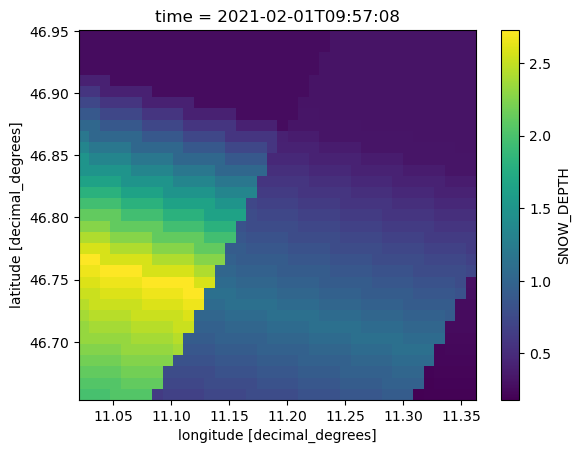

In [7]:
cube.SNOW_DEPTH.sel(time='2018-04-02T10:24:35.000000000', method='nearest').plot.imshow()

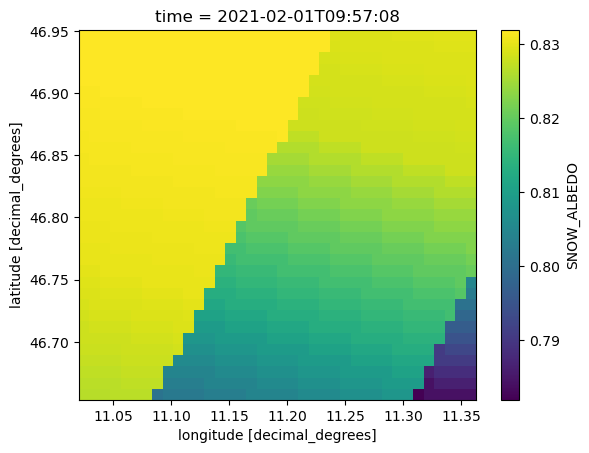

In [8]:
cube.SNOW_ALBEDO.sel(time='2018-04-02T10:24:35.000000000', method='nearest').plot.imshow()

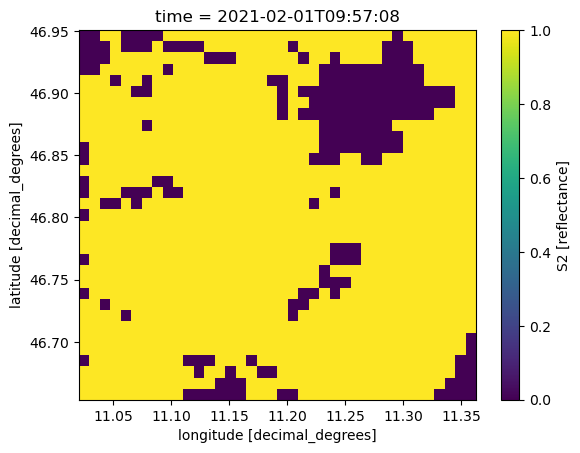

In [9]:
cube.S2.sel(time='2018-05-09', method='nearest').plot.imshow()

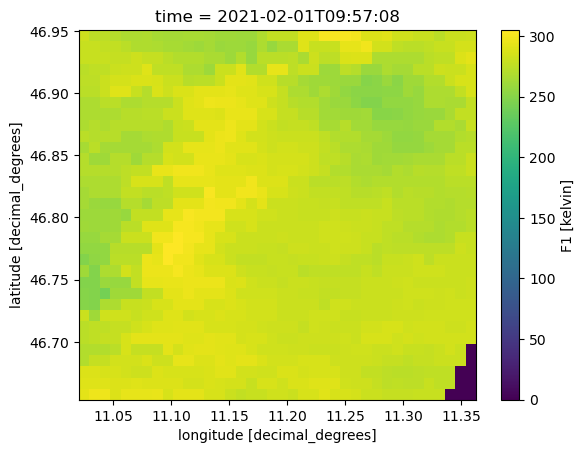

In [20]:
cube.F1.sel(time='2018-04-02T10:24:35.000000000', method='nearest').plot.imshow()